In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import GPyOpt

## Define Objective

In [3]:
objective_true  = GPyOpt.objective_examples.experiments2d.branin()                 # true function
objective_noisy = GPyOpt.objective_examples.experiments2d.branin(sd = 0.0)         # noisy version
objective_true.bounds[1] = (0,15)
objective_noisy.bounds[1] = (0,15)
bounds = objective_noisy.bounds
bounds[1] = (0,15)
bounds

domain = [{'name': 'var_1', 'type': 'continuous', 'domain': bounds[0]}, ## use default bounds
          {'name': 'var_2', 'type': 'continuous', 'domain': bounds[1]}]

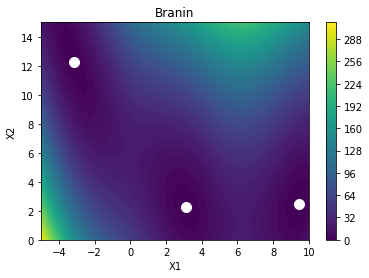

In [4]:
objective_noisy.plot()

### Define Time Cost

In [5]:
time_func  = GPyOpt.objective_examples.experiments2d.simpletime(a=1) 
time_func.bounds[0] = (-5,10)
time_func.bounds[1] = (0,15)
bounds

domain = [{'name': 'var_1', 'type': 'continuous', 'domain': bounds[0]}, ## use default bounds
          {'name': 'var_2', 'type': 'continuous', 'domain': bounds[1]}]

In [6]:
bounds[0][0]

-5

In [7]:
min(1,2,3,4)

1

In [9]:
print(time_func.f((8,0))[0,0])
print(time_func.f((-5,0)))

14.0
[[1.]]


In [7]:
time_func.ftime(time_func.min[0])

array([[1.00397887]])

In [6]:
def run_BO(objective_func, time_cost_func ,num_cores=4, max_iter=6, num_init_design=5):
    
    #np.random.seed(123)
    BO = GPyOpt.methods.TimeCostBayesianOptimization(
        f=objective_func,
        t = time_cost_func,
        domain = domain,
        #model_type= 'GP_MCMC',
        acquisition_type="TimeLCB",#acquisition_type='EI_MCMC',                                                
        normalize_Y = True,
        initial_design_numdata = num_init_design,
        num_cores = num_cores,
        acquisition_jitter = 1.5,
    )
    BO.run_optimization(max_iter)
    #BO_demo_parallel.plot_convergence()
    return BO